<a href="https://colab.research.google.com/github/Minakshi654/Modelname/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

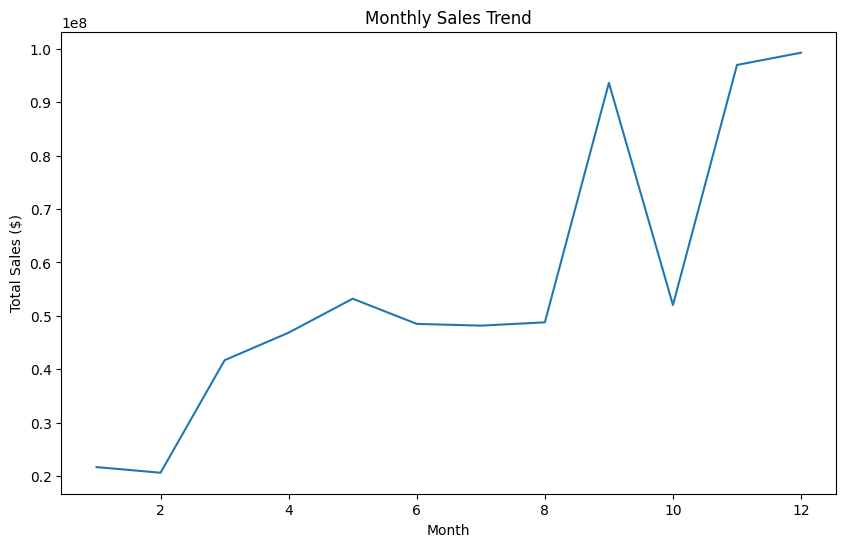

Highest sales month: 12, Amount: $99266059


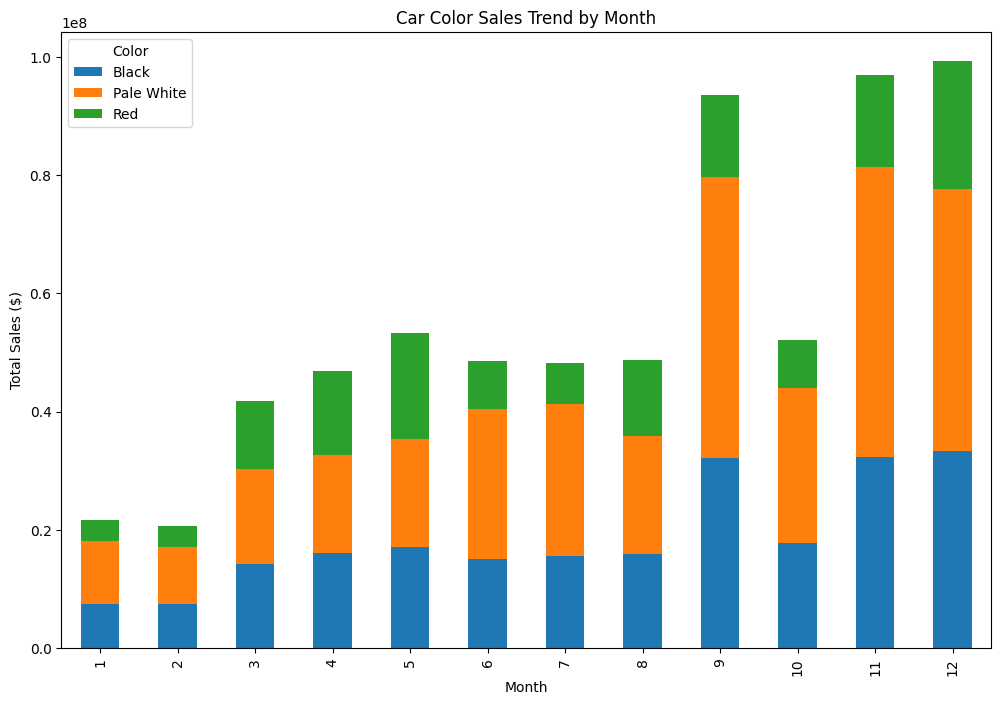

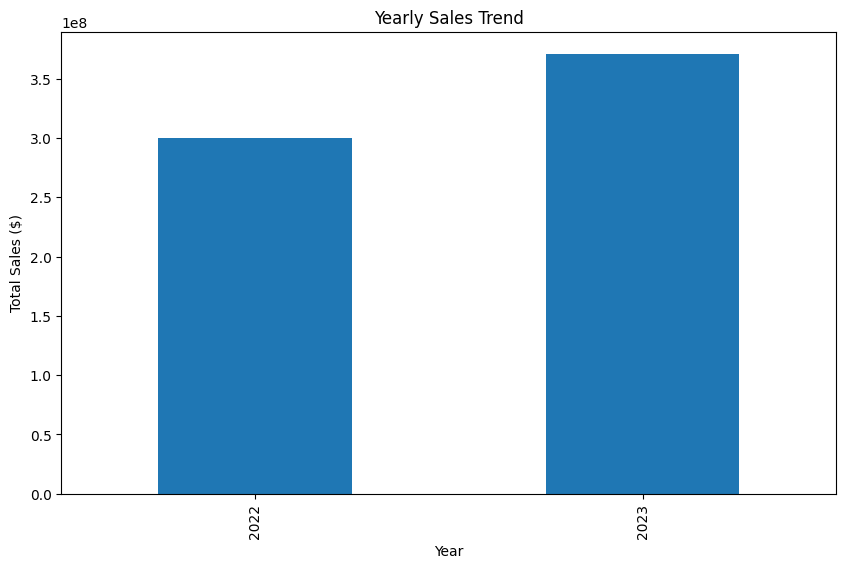

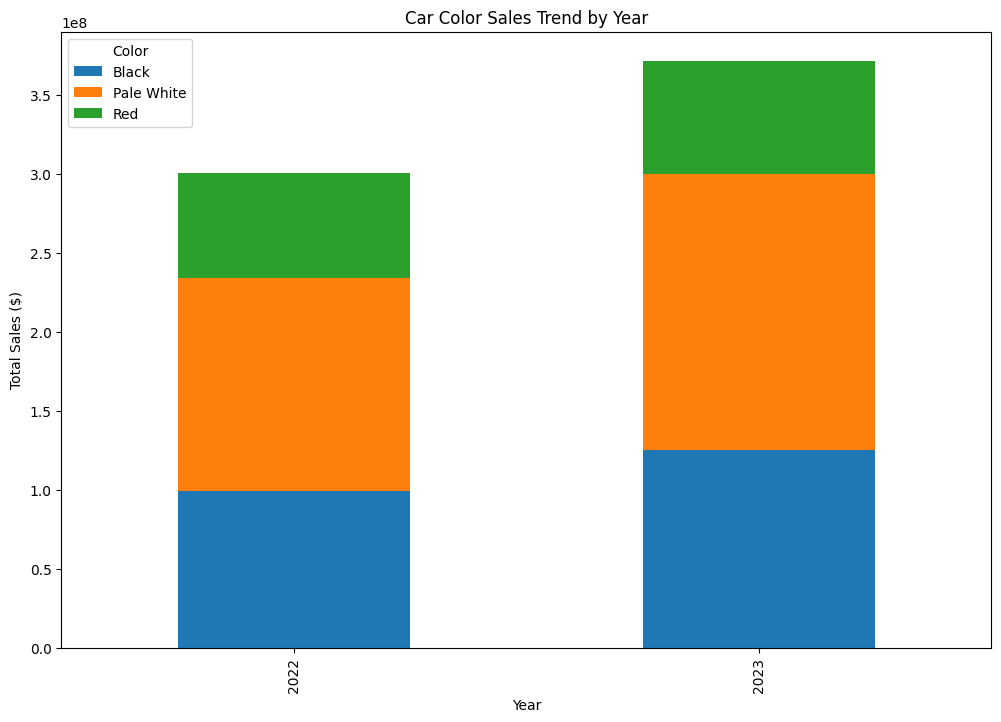

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/car sales.csv')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from 'Date'
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by month to find sales trends
monthly_sales = df.groupby('Month')['Price ($)'].sum()

# Plot monthly sales trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()

# Find the highest sales month
highest_sales_month = monthly_sales.idxmax()
highest_sales_amount = monthly_sales.max()

print(f'Highest sales month: {highest_sales_month}, Amount: ${highest_sales_amount}')

# Group by color to find the highest selling car color in each month
color_trend = df.groupby(['Month', 'Color'])['Price ($)'].sum().unstack().fillna(0)

# Plot color trend
color_trend.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Car Color Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.show()

# Repeat similar analysis for year-wise trends
yearly_sales = df.groupby('Year')['Price ($)'].sum()
yearly_color_trend = df.groupby(['Year', 'Color'])['Price ($)'].sum().unstack().fillna(0)

# Plot yearly trends
yearly_sales.plot(kind='bar', figsize=(10, 6))
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.show()

yearly_color_trend.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Car Color Sales Trend by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales ($)')
plt.show()


In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

def send_sales_summary_email(recipient_email, subject, body):
    sender_email = 'your_email@example.com'
    sender_password = 'your_password'

    # Set up the email
    msg = MIMEMultipart()
    msg['From'] = sender_email
    msg['To'] = recipient_email
    msg['Subject'] = subject

    msg.attach(MIMEText(body, 'plain'))

    # Send the email
    with smtplib.SMTP('smtp.example.com', 587) as server:
        server.starttls()
        server.login(sender_email, sender_password)
        server.send_message(msg)

    print('Email sent successfully')

# Example usage
recipient = 'recipient_email@example.com'
subject = 'Monthly Sales Summary'
body = 'Your sales summary goes here...'
send_sales_summary_email(recipient, subject, body)
